In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install torch
!pip install grafx
!pip install torchaudio


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [42]:
import pandas as pd 
import torch
pkl_file = pd.read_pickle("/data4/soumya/workspace/grafx-prune/mixing_secrets_excerpts_DaimonB_AnotherLife2/prune_hybrid_1e_2_result.pickle")
# print(pkl_file)
# print every new key in a new line
for key in pkl_file.keys():
    print(key)
    print(pkl_file[key])
    print("\n")

parameters
ParameterDict(
    (compressor): Object of type: ParameterDict
    (delay): Object of type: ParameterDict
    (eq): Object of type: ParameterDict
    (gain_panning): Object of type: ParameterDict
    (noisegate): Object of type: ParameterDict
    (reverb): Object of type: ParameterDict
    (stereo_imager): Object of type: ParameterDict
  (compressor): ParameterDict(
      (log_knee): Parameter containing: [torch.FloatTensor of size 14x1]
      (log_ratio): Parameter containing: [torch.FloatTensor of size 14x1]
      (log_threshold): Parameter containing: [torch.FloatTensor of size 14x1]
      (z_alpha_pre): Parameter containing: [torch.FloatTensor of size 14x1]
  )
  (delay): ParameterDict(
      (delay_z): Parameter containing: [torch.FloatTensor of size 0x40x2]
      (log_fir_magnitude): Parameter containing: [torch.FloatTensor of size 0x40x20]
  )
  (eq): ParameterDict(  (log_magnitude): Parameter containing: [torch.FloatTensor of size 13x1024])
  (gain_panning): Paramete

In [51]:
import networkx as nx
G = pkl_file["G"]
print(list(G))
# sort
G = nx.topological_sort(G)
print(list(G))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 60, 26, 27, 48, 49, 64, 28, 36, 37, 29, 30, 53, 40, 31, 42, 32, 44, 33, 34, 35, 63, 50, 66, 67, 38, 39, 41, 55, 43, 57, 45, 46, 47, 71, 65, 72, 51, 52, 54, 56, 58, 59, 62, 82, 74, 80, 68, 61, 70, 83, 73, 69, 75, 76, 78, 77, 81, 79, 84]


In [ ]:
G = pkl_file['G']
for node in G.nodes:
    print(G.nodes[node])
    
    parameters = pkl_file['parameters']
    params = parameters.get(node, {})
    # print(params)
    processed_params = []
    for param_name, param_tensor in params.items():
        print(param_name)
        print(param_tensor)
        processed_params.append(param_tensor.flatten())
        print(processed_params)
    # for effect_name, param_name in parameters.items():
    #         print(effect_name)
    #         print(param_name)
    #         for name, ptensor in param_name.items():
    #             print(name)
    #             print(ptensor)
    #         print("\n")


In [35]:
param_type = pkl_file['parameters']
effect_dict = {}
max_parameters = 1024
for effect_name, param_name in param_type.items():
        print(effect_name)
        # print(param_name)
        param = []
        effect_dict[effect_name] = {}
        for name, ptensor in param_name.items():
            print(ptensor.shape)
            # if len(ptensor.shape) > 2:
            #     #  ptensor = ptensor.reshape(ptensor.shape[0], -1)
            #     ptensor.flatten(start_dim=1)
            #     print(ptensor.shape)
            param.append(ptensor.flatten
                         (start_dim=1))
        # print(param)
        modified_ptensor = torch.stack(param, dim=1).squeeze()
        print(modified_ptensor.shape)
        if modified_ptensor.shape[1] < max_parameters:
            param_mask = torch.ones(modified_ptensor.shape[1])
            param_mask = torch.cat([param_mask, torch.zeros(max_parameters - modified_ptensor.shape[1])])
            modified_ptensor= torch.cat([modified_ptensor, torch.zeros(modified_ptensor.shape[0], max_parameters - modified_ptensor.shape[1])],
                                         dim=1)
            print(modified_ptensor.shape)
            print(param_mask.shape)
            print(param_mask.sum())
            effect_dict[effect_name]["param"] = modified_ptensor
            effect_dict[effect_name]["mask"] = param_mask
        else:
             print("something went wrong")
        
# 
for effect_name, param_tensor in effect_dict.items():
    print(effect_name)
    print(param_tensor)
    print("\n")

compressor
torch.Size([14, 1])
torch.Size([14, 1])
torch.Size([14, 1])
torch.Size([14, 1])
torch.Size([14, 4])
torch.Size([14, 1024])
torch.Size([1024])
tensor(4.)
delay
torch.Size([0, 40, 2])
torch.Size([0, 40, 20])


RuntimeError: stack expects each tensor to be equal size, but got [0, 80] at entry 0 and [0, 800] at entry 1

In [41]:
import torch

# Sample data based on your description
parameter_dict = pkl_file['parameters']
# Step 1: Determine max_parameters
max_parameters = 1024
# effect_param_sizes = {}

# for effect_name, params in parameter_dict.items():
#     param_list = []
    
#     for param_name, param_tensor in params.items():
#         if param_tensor.numel() == 0:
#             continue  # Skip empty tensors
        
#         first_dim = param_tensor.shape[0]  # Assume first dim is batch-like
#         flattened_param = param_tensor.view(first_dim, -1)  # Flatten last dims
#         param_list.append(flattened_param)
    
#     if param_list:
#         total_param_size = sum(p.shape[-1] for p in param_list)
#         effect_param_sizes[effect_name] = total_param_size
#         max_parameters = max(max_parameters, total_param_size)

# Step 2: Process parameters into final dict with padding
processed_params = {}

for effect_name, params in parameter_dict.items():
    param_list = []
    mask_list = []
    print(effect_name)
    for param_name, param_tensor in params.items():
        if param_tensor.numel() == 0:
            continue  # Skip empty tensors
        
        first_dim = param_tensor.shape[0]  # Assume first dim is batch-like
        flattened_param = param_tensor.view(first_dim, -1)  # Flatten last dims
        param_list.append(flattened_param)

    if param_list:
        # Stack and concatenate along last dim
        params_tensor = torch.cat(param_list, dim=-1)
        print(params_tensor.shape)
        mask_tensor = torch.ones_like(params_tensor, dtype=torch.bool)
    else:
        # If no valid params, return empty tensors
        params_tensor = torch.empty(0)
        mask_tensor = torch.empty(0, dtype=torch.bool)

    # Step 3: Pad tensors to max_parameters
    pad_size = max_parameters - params_tensor.shape[-1]
    
    if pad_size > 0:
        pad_tensor = torch.zeros((params_tensor.shape[0], pad_size), dtype=params_tensor.dtype)
        pad_mask = torch.zeros((mask_tensor.shape[0], pad_size), dtype=torch.bool)
        params_tensor = torch.cat([params_tensor, pad_tensor], dim=-1)
        mask_tensor = torch.cat([mask_tensor, pad_mask], dim=-1)

    processed_params[effect_name] = {
        "params": params_tensor,
        "param_mask": mask_tensor,
    }

# Example Output Shapes
print(f"max_parameters: {max_parameters}")
for effect, data in processed_params.items():
    print(f"{effect}: params {data['params'].shape}, mask {data['param_mask'].sum()/len(data['param_mask'])}")


compressor
torch.Size([14, 4])
delay
eq
torch.Size([13, 1024])
gain_panning
torch.Size([16, 2])
noisegate
torch.Size([1, 4])
reverb
torch.Size([3, 772])
stereo_imager
torch.Size([2, 1])
max_parameters: 1024
compressor: params torch.Size([14, 1024]), mask 4.0
delay: params torch.Size([0, 1024]), mask nan
eq: params torch.Size([13, 1024]), mask 1024.0
gain_panning: params torch.Size([16, 1024]), mask 2.0
noisegate: params torch.Size([1, 1024]), mask 4.0
reverb: params torch.Size([3, 1024]), mask 772.0
stereo_imager: params torch.Size([2, 1024]), mask 1.0


In [ ]:
len(pkl_file['weight'])


85

In [10]:
import networkx as nx
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric

In [ ]:
G = pkl_file["G"]

G = nx.topological_sort(G)
    # we will convert the nde_type attribute inyto a one-hot encoding
node_list = []
for node in G:
    node_list.append(node)
node_list = sorted(node_list)
print("node_list", node_list)
node_dict = {node: i for i, node in enumerate(node_list)}
# convert the nde_type attribute inyto a one-hot encoding

print("node_dict",node_dict)
# apply the mapping to the nodes
G = nx.relabel_nodes(G, node_dict)
# convert edge into edge_index
edge_index = []
for edge in G.edges():
    edge_index.append([edge[0], edge[1]])
edge_index = torch.tensor(edge_index).t().contiguous()
# convert node attributes into tensor
x = []
for node in G.nodes():
    x.append(G.nodes[node]["node_type"])
x = torch.tensor(x)
# print edge_index, node_attr
print(edge_index)
print(x)

node_list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
node_dict {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 

TypeError: cannot create 'generator' instances

In [14]:
import networkx as nx
G = pkl_file["G"]
sorted_nodes = list(nx.topological_sort(G))
print(sorted_nodes)
print(len(sorted_nodes))
# print(sorted_nodes[0])


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 60, 26, 27, 48, 49, 64, 28, 36, 37, 29, 30, 53, 40, 31, 42, 32, 44, 33, 34, 35, 63, 50, 66, 67, 38, 39, 41, 55, 43, 57, 45, 46, 47, 71, 65, 72, 51, 52, 54, 56, 58, 59, 62, 82, 74, 80, 68, 61, 70, 83, 73, 69, 75, 76, 78, 77, 81, 79, 84]
85


In [20]:
for i in range(len(sorted_nodes)):
  
    node = sorted_nodes[i]
    print(node)
    print(G.nodes[node])
    print("\n")


0
{'node_type': 'in', 'parameters': None, 'name': '06_Tom1', 'rendering_order': 0}


1
{'node_type': 'in', 'parameters': None, 'name': '07_Tom2', 'rendering_order': 0}


2
{'node_type': 'in', 'parameters': None, 'name': '08_Ride', 'rendering_order': 0}


3
{'node_type': 'in', 'parameters': None, 'name': '11_Bass', 'rendering_order': 0}


4
{'node_type': 'in', 'parameters': None, 'name': '10_Drum Room', 'rendering_order': 0}


5
{'node_type': 'in', 'parameters': None, 'name': '15_ElecGtr', 'rendering_order': 0}


6
{'node_type': 'in', 'parameters': None, 'name': '16_ElecGtrDT', 'rendering_order': 0}


7
{'node_type': 'in', 'parameters': None, 'name': '02_KickOut', 'rendering_order': 0}


8
{'node_type': 'in', 'parameters': None, 'name': '01_KickIn', 'rendering_order': 0}


9
{'node_type': 'in', 'parameters': None, 'name': '09_Overheads', 'rendering_order': 0}


10
{'node_type': 'in', 'parameters': None, 'name': '03_SnareUp', 'rendering_order': 0}


11
{'node_type': 'in', 'parameters': N

In [22]:
node_types = nx.get_node_attributes(G, "node_type")  # Get node types
print(node_types)
for key, value in node_types.items():
    if value == "in":
        # the the name attribute of the node
        node_types[key]  = G.nodes[key]["name"]
    else:
        node_types[key] = value
print(node_types)
# sorted_nodes = sorted(G.nodes, key=lambda x: node_types[x])
# print(sorted_nodes)

{0: 'in', 1: 'in', 2: 'in', 3: 'in', 4: 'in', 5: 'in', 6: 'in', 7: 'in', 8: 'in', 9: 'in', 10: 'in', 11: 'in', 12: 'in', 13: 'in', 14: 'in', 15: 'in', 16: 'in', 17: 'in', 18: 'in', 19: 'in', 20: 'in', 21: 'in', 22: 'in', 23: 'in', 24: 'in', 25: 'in', 26: 'eq', 27: 'eq', 28: 'eq', 29: 'eq', 30: 'eq', 31: 'eq', 32: 'eq', 33: 'eq', 34: 'compressor', 35: 'compressor', 36: 'compressor', 37: 'compressor', 38: 'compressor', 39: 'compressor', 40: 'compressor', 41: 'compressor', 42: 'compressor', 43: 'compressor', 44: 'compressor', 45: 'compressor', 46: 'gain_panning', 47: 'gain_panning', 48: 'gain_panning', 49: 'gain_panning', 50: 'gain_panning', 51: 'gain_panning', 52: 'gain_panning', 53: 'gain_panning', 54: 'gain_panning', 55: 'gain_panning', 56: 'gain_panning', 57: 'gain_panning', 58: 'gain_panning', 59: 'reverb', 60: 'mix', 61: 'mix', 62: 'mix', 63: 'mix', 64: 'mix', 65: 'mix', 66: 'mix', 67: 'mix', 68: 'mix', 69: 'eq', 70: 'eq', 71: 'eq', 72: 'eq', 73: 'eq', 74: 'compressor', 75: 'compres

In [23]:
print(G.edges)

[(0, 60, 0), (1, 60, 0), (2, 60, 0), (3, 26, 0), (4, 27, 0), (5, 48, 0), (6, 49, 0), (7, 64, 0), (8, 64, 0), (9, 28, 0), (10, 66, 0), (11, 36, 0), (12, 66, 0), (13, 67, 0), (14, 67, 0), (15, 37, 0), (16, 29, 0), (17, 30, 0), (18, 68, 0), (19, 53, 0), (20, 40, 0), (21, 31, 0), (22, 42, 0), (23, 32, 0), (24, 44, 0), (25, 33, 0), (26, 34, 0), (27, 35, 0), (28, 50, 0), (29, 38, 0), (30, 39, 0), (31, 41, 0), (32, 43, 0), (33, 45, 0), (34, 46, 0), (35, 47, 0), (36, 66, 0), (37, 67, 0), (38, 51, 0), (39, 52, 0), (40, 68, 0), (41, 54, 0), (42, 55, 0), (43, 56, 0), (44, 57, 0), (45, 58, 0), (46, 59, 0), (47, 62, 0), (48, 63, 0), (49, 63, 0), (50, 65, 0), (51, 68, 0), (52, 68, 0), (53, 68, 0), (54, 68, 0), (55, 68, 0), (56, 68, 0), (57, 68, 0), (58, 68, 0), (59, 61, 0), (60, 84, 0), (61, 69, 0), (62, 70, 0), (63, 71, 0), (64, 84, 0), (65, 74, 0), (66, 84, 0), (67, 72, 0), (68, 73, 0), (69, 76, 0), (70, 84, 0), (71, 82, 0), (72, 80, 0), (73, 75, 0), (74, 84, 0), (75, 78, 0), (76, 77, 0), (77, 79,

In [10]:
edges = list(pkl_file["G"].edges)
print(edges)

[(0, 60, 0), (1, 60, 0), (2, 60, 0), (3, 26, 0), (4, 27, 0), (5, 48, 0), (6, 49, 0), (7, 64, 0), (8, 64, 0), (9, 28, 0), (10, 66, 0), (11, 36, 0), (12, 66, 0), (13, 67, 0), (14, 67, 0), (15, 37, 0), (16, 29, 0), (17, 30, 0), (18, 68, 0), (19, 53, 0), (20, 40, 0), (21, 31, 0), (22, 42, 0), (23, 32, 0), (24, 44, 0), (25, 33, 0), (26, 34, 0), (27, 35, 0), (28, 50, 0), (29, 38, 0), (30, 39, 0), (31, 41, 0), (32, 43, 0), (33, 45, 0), (34, 46, 0), (35, 47, 0), (36, 66, 0), (37, 67, 0), (38, 51, 0), (39, 52, 0), (40, 68, 0), (41, 54, 0), (42, 55, 0), (43, 56, 0), (44, 57, 0), (45, 58, 0), (46, 59, 0), (47, 62, 0), (48, 63, 0), (49, 63, 0), (50, 65, 0), (51, 68, 0), (52, 68, 0), (53, 68, 0), (54, 68, 0), (55, 68, 0), (56, 68, 0), (57, 68, 0), (58, 68, 0), (59, 61, 0), (60, 84, 0), (61, 69, 0), (62, 70, 0), (63, 71, 0), (64, 84, 0), (65, 74, 0), (66, 84, 0), (67, 72, 0), (68, 73, 0), (69, 76, 0), (70, 84, 0), (71, 82, 0), (72, 80, 0), (73, 75, 0), (74, 84, 0), (75, 78, 0), (76, 77, 0), (77, 79,

In [11]:
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
print(edge_index)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
         72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
        [60, 60, 60, 26, 27, 48, 49, 64, 64, 28, 66, 36, 66, 67, 67, 37, 29, 30,
         68, 53, 40, 31, 42, 32, 44, 33, 34, 35, 50, 38, 39, 41, 43, 45, 46, 47,
         66, 67, 51, 52, 68, 54, 55, 56, 57, 58, 59, 62, 63, 63, 65, 68, 68, 68,
         68, 68, 68, 68, 68, 61, 84, 69, 70, 71, 84, 74, 84, 72, 73, 76, 84, 82,
         80, 75, 84, 78, 77, 79, 81, 84, 83, 84, 84, 84],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

In [4]:
parameters = pkl_file["parameters"]
for key, value in parameters.items():
    if key =="reverb":
        print(key)
        print(value)
        print("\n")

reverb
ParameterDict(
    (delta_log_magnitude): Parameter containing: [torch.FloatTensor of size 3x2x193]
    (init_log_magnitude): Parameter containing: [torch.FloatTensor of size 3x2x193]
)




In [12]:
node_features = []
G = pkl_file["G"]
for node in G.nodes():
    # Add your logic here to fetch node features, e.g., node['feature']
    # For now, we assume each node has no feature, so we use a default feature of 1
    node_features.append([1])  # Example: one feature per node
    print(node, node_features[-1])

    

0 [1]
1 [1]
2 [1]
3 [1]
4 [1]
5 [1]
6 [1]
7 [1]
8 [1]
9 [1]
10 [1]
11 [1]
12 [1]
13 [1]
14 [1]
15 [1]
16 [1]
17 [1]
18 [1]
19 [1]
20 [1]
21 [1]
22 [1]
23 [1]
24 [1]
25 [1]
26 [1]
27 [1]
28 [1]
29 [1]
30 [1]
31 [1]
32 [1]
33 [1]
34 [1]
35 [1]
36 [1]
37 [1]
38 [1]
39 [1]
40 [1]
41 [1]
42 [1]
43 [1]
44 [1]
45 [1]
46 [1]
47 [1]
48 [1]
49 [1]
50 [1]
51 [1]
52 [1]
53 [1]
54 [1]
55 [1]
56 [1]
57 [1]
58 [1]
59 [1]
60 [1]
61 [1]
62 [1]
63 [1]
64 [1]
65 [1]
66 [1]
67 [1]
68 [1]
69 [1]
70 [1]
71 [1]
72 [1]
73 [1]
74 [1]
75 [1]
76 [1]
77 [1]
78 [1]
79 [1]
80 [1]
81 [1]
82 [1]
83 [1]
84 [1]


In [13]:
# Convert node features to a PyTorch tensor
x = torch.tensor(node_features, dtype=torch.float)
print(x)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [ ]:
import torch
import networkx as nx
import numpy as np
from torch_geometric.data import Data

def convert_to_pyg(data_dict):
    """
    Converts a NetworkX graph from data_dict['G'] into a PyG Data object.
    
    Args:
        data_dict (dict): Dictionary containing the graph under 'G' and parameters under 'parameters'.
    
    Returns:
        pyg_data (torch_geometric.data.Data): PyG representation of the graph.
        graph_info (dict): Contains metadata like node type ratios.
        std_param_dict (dict): Standardized parameters with tensors converted to NumPy arrays.
    """
    # Extract graph and parameters
    G = data_dict["G"]
    print("G", G)
    param_dict = data_dict["parameters"]
    print("nodes", G.nodes)
    print("edges", G.edges)
    # Extract nodes and edges
    nodes = list(G.nodes(data=True))  # (node_id, node_attr)
    edges = list(G.edges(data=True))  # (src, tgt, edge_attr)
    unique_node_types = data_dict["G_tensor"].type_sequence
    weight = data_dict["weight"]
    edge_weight_dict = {(src, tgt): weight[i].item() for i, (src, tgt, edge_dict) in enumerate(edges)}
    print("edge_weight_dict", edge_weight_dict)
    # Unique node types for one-hot encoding
    # unique_node_types = sorted(set(attr["node_type"] for _, attr in nodes))
    print("unique_node_types", unique_node_types)
    type_to_idx = {t: i for i, t in enumerate(unique_node_types)}
    num_types = len(unique_node_types)

    # Topologically sort the graph
    sorted_nodes = list(nx.topological_sort(G))
    node_id_map = {old_id: new_id for new_id, old_id in enumerate(sorted_nodes)}
    print("node_id_map", node_id_map)
    

    # Process node attributes
    node_attrs = []
    node_processor_dict = {}
    for node_id in sorted_nodes:
        attr = G.nodes[node_id]
        type_one_hot = np.zeros(num_types, dtype=np.float32)
        type_one_hot[type_to_idx[attr["node_type"]]] = 1
        node_processor_dict[node_id] = attr["node_type"]
        node_attrs.append(type_one_hot)
    print("node_attrs", node_attrs)
    print("node_processor_dict", node_processor_dict)
    # Process edges
    edge_index = []
    edge_attr = []
    # data_dict["weights"] contains the edge weights
    
    print("edges", edges)
    # 
    for src, tgt, edge in edges:
        edge_index.append([node_id_map[src], node_id_map[tgt]])
        edge_attr.append(edge_weight_dict.get((src, tgt), 1.0))    # Default weight if missing

    print("edge_index",edge_index)
    print("edge_attr", edge_attr)

    # Convert to PyTorch tensors
    node_attrs = torch.tensor(node_attrs, dtype=torch.float32)
    edge_index = torch.tensor(edge_index, dtype=torch.long).T
    edge_attr = torch.tensor(edge_attr, dtype=torch.float32)

    #  we will first recover the parameters for each processor node and then pad to the largest number of parameters and create another tensor mask` to indicate the padding`
    # Standardize parameters
    # std_param_dict = {}
    # for node_id, param_dict in param_dict.items():
    #     std_param_dict[node_id] = {}
    #     for param_name, param_tensor in param_dict.items():
    #         std_param_dict[node_id][param_name] = param_tensor.numpy()
    # print("std_param_dict", std_param_dict)
    param_dict_full = {}
    for key,value in node_processor_dict.items():
        param_dict_full[key] = {}
        for key1, value1 in param_dict[value].items():
            param_dict_full[key][key1] = value1
    # Compute node type ratios
    node_counts = {t: sum(1 for _, attr in nodes if attr["node_type"] == t) for t in unique_node_types}
    total_nodes = sum(node_counts.values())
    type_ratios = {t: node_counts[t] / total_nodes for t in node_counts}

    # PyG Data object
    pyg_data = Data(x=node_attrs, edge_index=edge_index, edge_attr=edge_attr)

    # Graph metadata
    graph_info = {
        "node_type_ratios": type_ratios,
        "num_nodes": G.number_of_nodes(),
        "num_edges": G.number_of_edges(),
        "unique_node_types": unique_node_types
    }

    return pyg_data, graph_info, std_param_dict


In [89]:
# graph_dict = pkl_file["G"]
# param_dict = pkl_file["parameters"]
pkl_file = pd.read_pickle("/data4/soumya/workspace/grafx-prune/mixing_secrets_excerpts_DaimonB_AnotherLife2/prune_hybrid_1e_2_result.pickle")

pyg_data, graph_info, std_param_dict = convert_to_pyg(pkl_file)
print(pyg_data)
print(graph_info)
# print(std_param_dict)

G GRAFX with 85 nodes & 84 edges
  [0] in -> [60] mix
  [1] in -> [60] mix
  [2] in -> [60] mix
  [3] in -> [26] eq
  [4] in -> [27] eq
  [5] in -> [48] gain_panning
  [6] in -> [49] gain_panning
  [7] in -> [64] mix
  [8] in -> [64] mix
  [9] in -> [28] eq
  [10] in -> [66] mix
  [11] in -> [36] compressor
  [12] in -> [66] mix
  [13] in -> [67] mix
  [14] in -> [67] mix
  [15] in -> [37] compressor
  [16] in -> [29] eq
  [17] in -> [30] eq
  [18] in -> [68] mix
  [19] in -> [53] gain_panning
  [20] in -> [40] compressor
  [21] in -> [31] eq
  [22] in -> [42] compressor
  [23] in -> [32] eq
  [24] in -> [44] compressor
  [25] in -> [33] eq
  [26] eq -> [34] compressor
  [27] eq -> [35] compressor
  [28] eq -> [50] gain_panning
  [29] eq -> [38] compressor
  [30] eq -> [39] compressor
  [31] eq -> [41] compressor
  [32] eq -> [43] compressor
  [33] eq -> [45] compressor
  [34] compressor -> [46] gain_panning
  [35] compressor -> [47] gain_panning
  [36] compressor -> [66] mix
  [37] co

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
param_dict = pkl_file["parameters"]

std_param_dict = {}
for node_id, param_dict in param_dict.items():
    std_param_dict[node_id] = {}
    for param_name, param_tensor in param_dict.items():
        std_param_dict[node_id][param_name] = param_tensor
print("std_param_dict", std_param_dict)
# the first value in the compressor dict is logknee value, the first value for it belongs to the first compressor node
# the second value in the compressor dict is ratio value, the second value for it belongs to the first compressor node

# this follows for all effects
# so we will try to go through the nodes and in the order of occurance of the nodes in the graph, we will try to get the parameters for each node
# and then we will try to get the parameters for each node and then pad to the largest number of parameters and create another tensor mask` to indicate the padding`
# if the node is mix or in, we will apply all zero and mask to it
# if the node is effect, we will apply the parameters to it and mask to it


std_param_dict {'compressor': {'log_knee': Parameter containing:
tensor([[ 1.0471],
        [-3.4807],
        [ 2.3624],
        [-0.0877],
        [ 1.7715],
        [ 1.5953],
        [-2.0821],
        [ 1.8971],
        [ 1.6836],
        [ 1.3213],
        [ 1.5790],
        [ 1.6466],
        [ 0.4360],
        [ 1.4562]], requires_grad=True), 'log_ratio': Parameter containing:
tensor([[ 0.2935],
        [ 3.4982],
        [ 2.0639],
        [ 0.3759],
        [ 2.6695],
        [ 1.4688],
        [ 5.4018],
        [ 1.2700],
        [ 1.8037],
        [ 1.6523],
        [ 2.3082],
        [ 1.3760],
        [ 1.7500],
        [-0.3467]], requires_grad=True), 'log_threshold': Parameter containing:
tensor([[ 1.1714],
        [-1.7713],
        [-2.3767],
        [-0.0565],
        [-1.9595],
        [-0.8869],
        [-0.0872],
        [-1.3252],
        [-1.7893],
        [-1.2742],
        [-2.1952],
        [-0.9055],
        [ 0.7725],
        [ 1.1603]], requires_grad=True

In [48]:
G_tensor = pkl_file["G_tensor"].type_sequence
print(G_tensor)

['in', 'eq', 'compressor', 'gain_panning', 'reverb', 'mix', 'eq', 'compressor', 'noisegate', 'stereo_imager', 'gain_panning', 'reverb', 'out']


In [83]:
# plot the graph
import matplotlib.pyplot as plt
import networkx as nx
import torch
from torch_geometric.data import Data

def plot_pyg_graph(data):
    """
    Plots a PyG Data object as a NetworkX graph.
    
    Args:
        data (torch_geometric.data.Data): PyG Data object.
    """
    # Extract node features and edge index
    x = data.x
    print("x", x)
    edge_index = data.edge_index
    # map each unique node type to a unique color
    # uncode one hot encoding in x to node type
    node_types = torch.argmax(x, dim=1).tolist()
    print("node_types", node_types)
    # each node type is represented by a unique color
    colors = [f"C{t}" for t in node_types]
    print("colors", colors)
    # Create a NetworkX graph
    G = nx.Graph()
    for i, x_i in enumerate(x):
        G.add_node(i, label=str(node_types[i]))

    for src, tgt in edge_index.T:
        G.add_edge(src.item(), tgt.item())
    # plot left to right
    # pos = nx.multipartite_layout(G)
    # Plot the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=colors, font_weight='bold')
    plt.show()
    

x tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
node_types [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 6, 10, 10, 5, 6, 7, 7, 6, 6, 10, 7, 6, 7, 6, 7, 6, 7, 7, 5, 10, 5, 5, 7, 7, 7, 10, 7, 10, 7, 10, 10, 6, 5, 6, 10, 10, 10, 10, 10, 11, 5, 11, 7, 10, 5, 5, 6, 11, 6, 6, 7, 8, 9, 9, 10, 10, 12]
colors ['C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C5', 'C6', 'C6', 'C10', 'C10', 'C5', 'C6', 'C7', 'C7', 'C6', 'C6', 'C10', 'C7', 'C6', 'C7', 'C6', 'C7', 'C6', 'C7', 'C7', 'C5', 'C10', 'C5', 'C5', 'C7', 'C7', 'C7', 'C10', 'C7', 'C10', 'C7', 'C10', 'C10', 'C6', 'C5', 'C6', 'C10', 'C10', 'C10', 'C10', 'C10', 'C11', 'C5', 'C11', 'C7', 'C10', '

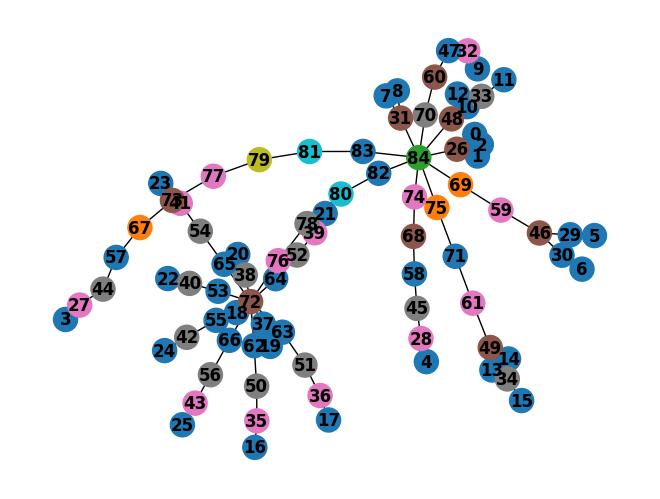

In [84]:
plot_pyg_graph(pyg_data)

In [1]:
# load pickle file
import pickle
with open("/data4/soumya/MSF_forum/alignment/Discussion Zone - Rock, Punk, Metal/Jack Hutcheson: 'The Narcissist'/5OVEREIGNTY/alignment.pickle", "rb") as f:
    data = pickle.load(f)
    print(data)

{'5OVEREIGNTY.mp3': np.float64(2.2675736961451248e-05), 'rough_mix.wav': np.float64(0.0), 'fine_match_info': {'5OVEREIGNTY.mp3': {'match_time': 5.9880146980285645, 'match_info': {'rough_mix.wav': {'locality_samples': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'offset_samples': [np.int64(1), np.int64(38), np.int64(-846), np.int64(428), np.int64(850), np.int64(-421), np.int64(-163), np.int64(215), np.int64(-127), np.int64(-868), np.int64(-183), np.int64(243), np.int64(-376), np.int64(-198), np.int64(469), np.int64(455), np.int64(673), np.int64(-633), np.int64(-1268), np.int64(-1695), np.int64(641), np.int64(268), np.int64(-391), np.int64(714), np.int64(1420), np.int64(285), np.int64(1274), np.int64(-602), np.int64(-1059), np.int64(888)], 'locality_seconds': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None